In [1]:
import matplotlib.pyplot as plt
import scipy as sci
import autograd as ad
import autograd.numpy as np
from cosmatrix import cosm,expm_pade
expm = expm_pade
from autograd.extend import primitive, defvjp
def create_custom_matrix(N, dim):
    # Initialize a dim x dim matrix with zeros
    matrix = np.zeros((2*dim+1, 2*dim+1))

    # Set the specified elements to 1
    for k in range(2*dim+1):
        if k  + N < 2*dim+1:
            matrix[k][k + N] = 1

    return matrix
def create_diagonal_matrix(dim, ng, Ec):
    # Initialize a dim x dim matrix with zeros
    matrix = np.zeros((2*dim+1, 2*dim+1))

    # Set the diagonal elements as per the given formula
    for k in range(2*dim+1):
        matrix[k][k] = 4 * Ec * ((k-dim)/N- ng)**2
    return matrix
def SNAIL(phi_ex,beta,N,Ej,Ec,ng):
    dim = 50
    phi_ex = 2*phi_ex*np.pi
    U = beta*np.exp(1j*phi_ex)*create_custom_matrix(N, dim)+N*create_custom_matrix(1, dim)
    U = U + np.transpose(U.conjugate())
    H = create_diagonal_matrix(dim, ng, Ec)-Ej*U/2
    energy,dressed_states = np.linalg.eigh(H)
    energy = energy-energy[0]*np.ones(len(energy))
    return energy[0],energy[1],energy[2],energy[3]

In [2]:
beta = 0.1

Ej = 15.9 * 2 * np.pi
Ec = 0.67 * 2 * np.pi
N = 3
dim=5
create_custom_matrix(N, dim)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [574]:
import scqubits as scq

In [575]:
scq.Transmon(18*2*np.pi,0.885*2*np.pi,0,100).eigenvals(evals_count=10)/2/np.pi

array([-12.58687852,  -2.26597331,   6.77997522,  15.39026737,
        18.82012264,  33.1579646 ,  33.26858345,  57.37281143,
        57.3732667 ,  88.96387726])

In [583]:
beta = 0.1

Ej = 15.9 * 2 * np.pi
Ec = 0.67 * 2 * np.pi
N = 3
phi_ex = 0.3824697065776507
ngs = np.linspace(-1,1,300)
e1 = np.zeros(len(ngs))
e2 = np.zeros(len(ngs))
e3 = np.zeros(len(ngs))
e4 = np.zeros(len(ngs))
for i in range(len(ngs)):
    e1[i],e2[i],e3[i],e4[i]= SNAIL(phi_ex,beta,N,Ej,Ec,ngs[i])

g3/g5?
snail hamiltonian approximation itself
further optimization
cavity frequency > snail frequency

Text(0, 0.5, '$ω_s$')

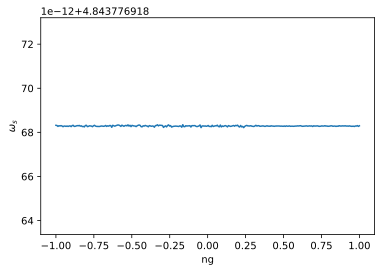

In [586]:
# plt.plot(ngs,e1/2/np.pi)
plt.plot(ngs,e2/2/np.pi)
plt.xlabel('ng')
plt.ylabel('$ω_s$')
# plt.plot(ngs,e3/2/np.pi)
# plt.plot(ngs,e4/2/np.pi)
# plt.yscale('log')

In [578]:
e2/2/np.pi

array([5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413709,
       5.25413709, 5.25413709, 5.25413709, 5.25413709, 5.25413

In [340]:
## import numpy as np
beta=0
Ej = 90*2*np.pi
Ec = 0.177*2*np.pi
N=1
phi_ex=0
# phi = np.linspace(0,2*N*np.pi,10000*N)
def wavef(phi,n):
    return 1/np.sqrt(2*np.pi*N)*np.exp(-1j*n*phi/N)


In [343]:
SNAIL(phi_ex,beta,N,Ej,Ec,0)[1]/2/np.pi

6.335480564713584

In [232]:
from scipy.integrate import quad
import numpy as np

from scipy.integrate import quad
import numpy as np

a=0
b=2*N*np.pi
def my_function_real(phi, n, m):
    func_value = np.conjugate(wavef(phi, m)) * (beta * np.cos(phi - phi_ex*2*np.pi) + N * np.cos(phi / N)) * wavef(phi, n)
    return func_value.real

def my_function_imag(phi, n, m):
    func_value = np.conjugate(wavef(phi, m)) * (beta * np.cos(phi - phi_ex*2*np.pi) + N * np.cos(phi / N)) * wavef(phi, n)
    return func_value.imag

def calculate_integral_matrix(dim):
    integral_matrix = np.zeros((2 * dim + 1, 2 * dim + 1), dtype=complex)
    
    for n in range(-dim, dim + 1):
        for m in range(-dim, dim + 1):
            integral_real, error_real = quad(my_function_real, a, b, args=(n, m))
            integral_imag, error_imag = quad(my_function_imag, a, b, args=(n, m))
            
            integral = round(integral_real, 5) + 1j * round(integral_imag, 5)
            integral_matrix[n + dim, m + dim] = integral

    return integral_matrix
# Example usage
dim = 2  # Replace with your desired dimension
integral_matrix = calculate_integral_matrix(dim)
print(integral_matrix)



[[-0. +0.j  1.5+0.j -0. +0.j  0. +0.j -0. +0.j]
 [ 1.5+0.j -0. +0.j  1.5+0.j -0. +0.j  0. +0.j]
 [ 0. +0.j  1.5+0.j  0. +0.j  1.5+0.j -0. +0.j]
 [-0. +0.j  0. +0.j  1.5+0.j  0. +0.j  1.5+0.j]
 [ 0. +0.j -0. +0.j  0. +0.j  1.5+0.j  0. +0.j]]


In [216]:
integral

1.0000000000000002

In [224]:
a,b

(0, 6.283185307179586)

In [421]:
import numpy as np
import scipy.sparse as sparse

beta = 0.15
Ej = 15 * 2 * np.pi
Ec = 0.885 * 2 * np.pi
N = 3
phi_ex = 0.3787872658175288

def potential(phi):
    return Ej * (-beta * np.cos(phi - phi_ex * 2 * np.pi) - N * np.cos(phi / N))

def get_eigsys(potential, ng):
    phi_ind_list = np.linspace(0, 2 * np.pi * N, 1000 * N)
    grid = scq.core.discretization.Grid1d(phi_ind_list[0], phi_ind_list[-1], len(phi_ind_list))
    potential_matrix = dia_matrix((potential(phi_ind_list), [0]), shape=(grid.pt_count, grid.pt_count)).tocsc()

    H1 = grid.second_derivative_matrix(prefactor=-4 * Ec, periodic=True)
    H2 = grid.first_derivative_matrix(prefactor=-8j * Ec * ng, periodic=True)
    dis_ham = H1 + potential_matrix + H2

    evals, eigs = sparse.linalg.eigsh(dis_ham, which='SA', k=3)
    evals = evals / (2 * np.pi)
    return evals

# Define ng values
ng_values = np.linspace(-1, 1, 10)

# Initialize an array to store the eigenvalues
eigenvalues_array = np.zeros((3, len(ng_values)))

# Populate the array with eigenvalues for each ng
for index, ng in enumerate(ng_values):
    eigenvalues = get_eigsys(potential, ng)
    eigenvalues_array[:, index] = eigenvalues
eigenvalues_array = eigenvalues_array

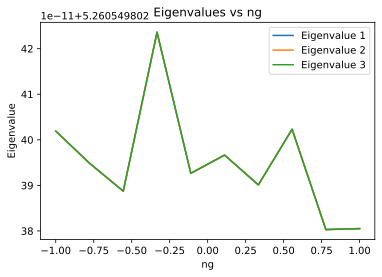

In [424]:
import matplotlib.pyplot as plt

# Assuming eigenvalues_array and ng_values are already computed as shown in previous code
# eigenvalues_array: Array of eigenvalues with shape (3, len(ng_values))
# ng_values: Array of ng values

# Plot each row of eigenvalues_array with respect to ng_values
for i in range(eigenvalues_array.shape[0]):
    plt.plot(ng_values, eigenvalues_array[1, :]- eigenvalues_array[0, :], label=f'Eigenvalue {i+1}')

plt.xlabel('ng')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs ng')
plt.legend()
plt.show()

In [393]:
eigenvalues_array[0, :]-eigenvalues_array[0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])